In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# \s+을 통해 여러 공백을 구분자로 설정
df = pd.read_csv("C:/Users/choha/Downloads/seeds/seeds_dataset.txt",sep='\s+',header = None) 
df



,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [54]:
col = ["area","perimeter","compactness","length_kernel","width_kernel","asymmetry_coefficient","length_kernel_groove","target"]

In [55]:
df.columns = col
df

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coefficient,length_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [12]:
df.isnull().sum()

area                     0
perimeter                0
compactness              0
length_kernel            0
width_kernel             0
asymmetry_coefficient    0
length_kernel_groove     0
target                   0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length_kernel          210 non-null    float64
 4   width_kernel           210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   length_kernel_groove   210 non-null    float64
 7   target                 210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [14]:
df.describe()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coefficient,length_kernel_groove,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [16]:
df["target"].value_counts()

1    70
2    70
3    70
Name: target, dtype: int64

In [56]:
X = df.drop("target",axis = 1)

In [57]:
y = df["target"]

In [58]:
# scaling 하기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.values

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.75, random_state = 0)

In [60]:
# 머신러닝 학습하기 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [61]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train,y_train)

pred_lr = clf_lr.predict(X_test)

print('\n ------ Logistic Regression Classifier------')
print(accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test, pred_lr))


 ------ Logistic Regression Classifier------
0.9245283018867925
[[16  0  1]
 [ 3 18  0]
 [ 0  0 15]]


In [62]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train,y_train)

pred_lr = clf_lr.predict(X_test)

print('\n ------ Logistic Regression Classifier------')
print(accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test, pred_lr))


 ------ Logistic Regression Classifier------
0.9245283018867925
[[16  0  1]
 [ 3 18  0]
 [ 0  0 15]]


In [63]:
clf_lr = RandomForestClassifier(random_state=0)
clf_lr.fit(X_train,y_train)

pred_lr = clf_lr.predict(X_test)

print('\n ------ Logistic Regression Classifier------')
print(accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test, pred_lr))


 ------ Logistic Regression Classifier------
0.9622641509433962
[[17  0  0]
 [ 2 19  0]
 [ 0  0 15]]


# Deep Learning

In [72]:
X = df.drop("target",axis = 1)
y = df["target"]


In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = pd.get_dummies(y-1)

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.75, random_state = 0)

In [75]:
y_train.shape

(157, 3)

In [76]:
X_train.shape[1]

7

In [86]:
from keras.layers import Input,Dense,Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
inputs = Input(shape=(7,))
x = Dense(64, activation='relu')(inputs)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

# 출력 레이어
outputs = Dense(3, activation='softmax')(x)


model = Model(inputs=inputs, outputs=outputs)

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                512       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4867 (19.01 KB)
Trainable params: 4867 (19.01

In [95]:
# 조기 종료 콜백 추가
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
model_history = model.fit(x=X_train, y=y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test.values,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
3/3 [==============================] - 0s 33ms/step - loss: 0.1446 - accuracy: 0.9427 - val_loss: 0.1268 - val_accuracy: 0.9434
Epoch 2/30
3/3 [==============================] - 0s 17ms/step - loss: 0.1569 - accuracy: 0.9554 - val_loss: 0.1330 - val_accuracy: 0.9434
Epoch 3/30
3/3 [==============================] - 0s 18ms/step - loss: 0.1028 - accuracy: 0.9682 - val_loss: 0.1331 - val_accuracy: 0.9434
Epoch 4/30
3/3 [==============================] - 0s 9ms/step - loss: 0.1039 - accuracy: 0.9618 - val_loss: 0.1334 - val_accuracy: 0.9434
Epoch 5/30
3/3 [==============================] - 0s 18ms/step - loss: 0.1040 - accuracy: 0.9490 - val_loss: 0.1396 - val_accuracy: 0.9434
Epoch 6/30
3/3 [==============================] - 0s 17ms/step - loss: 0.1528 - accuracy: 0.9363 - val_loss: 0.1491 - val_accuracy: 0.9434
Epoch 7/30
3/3 [==============================] - 0s 9ms/step - loss: 0.0905 - accuracy: 0.9490 - val_loss: 0.1479 - val_accuracy: 0.9434
Epoch 8/30
3/3 [=============

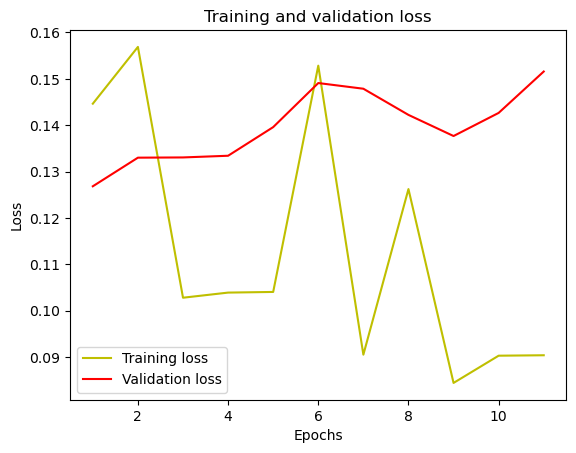

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

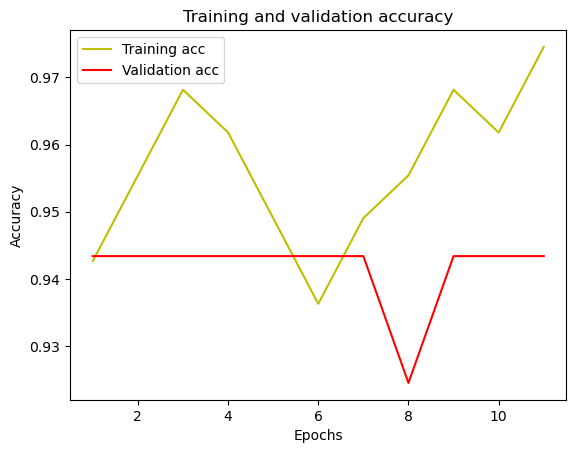

In [97]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()